# Perceptron Learning Algorithm
## LAB 1

> Name: Debatreya Das <br>
> CS-A4 <br>
> Roll No. 12212070

## Q.1.
Create a linearly separable dataset of 200 points.
Apply Perceptron Learning Algorithm
Draw the Decision Boundary to separate the datapoints

In [90]:
# Necessary Imports
import numpy as np
import matplotlib.pyplot as plt

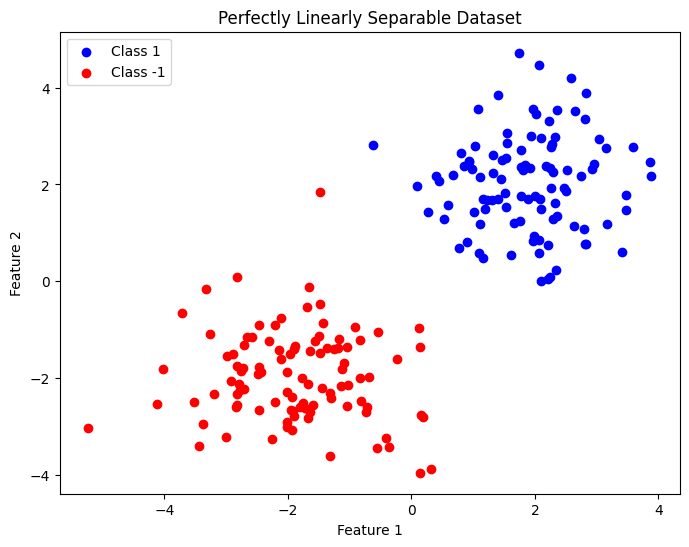

In [91]:
# GENERATING the Dataset
# Generate a perfectly linearly separable dataset
np.random.seed(42)  # For reproducibility

# Generate points for Class 1
class_1 = np.random.randn(100, 2) + [2, 2]  # Centered at (2, 2)

# Generate points for Class -1
class_minus_1 = np.random.randn(100, 2) + [-2, -2]  # Centered at (-2, -2)

# Combine the datasets
X = np.vstack((class_1, class_minus_1))
y = np.hstack((np.ones(100), -np.ones(100)))  # Class 1: 1, Class -1: -1

# Plot the generated dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.title("Perfectly Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Function to plot decision boundary

In [92]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, weights):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
    
    # Calculate decision boundary line
    x_min, x_max = plt.xlim()
    x_vals = np.linspace(x_min, x_max, 100)
    y_vals = -(weights[0] * x_vals) / weights[1]
    
    plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')
    plt.title("Perceptron Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

## Perceptron Learning Algorithm

In [93]:
def PLA(X, y, max_iterations=1000):
    # Initialize weights (randomly)
    weights = np.zeros(X.shape[1])
    
    for _ in range(max_iterations):
        for i in range(len(y)):
                # Misclassification (This is in vectorized form and y_i is -1 or 1)
            if y[i] * np.dot(X[i], weights) <= 0: 
                # Update weights and bias
                weights += (X[i] * y[i])
    return weights

In [94]:
# Train the Perceptron
weights= PLA(X, y, 100)

print(f"Weights: {weights}")

Weights: [2.49671415 1.8617357 ]


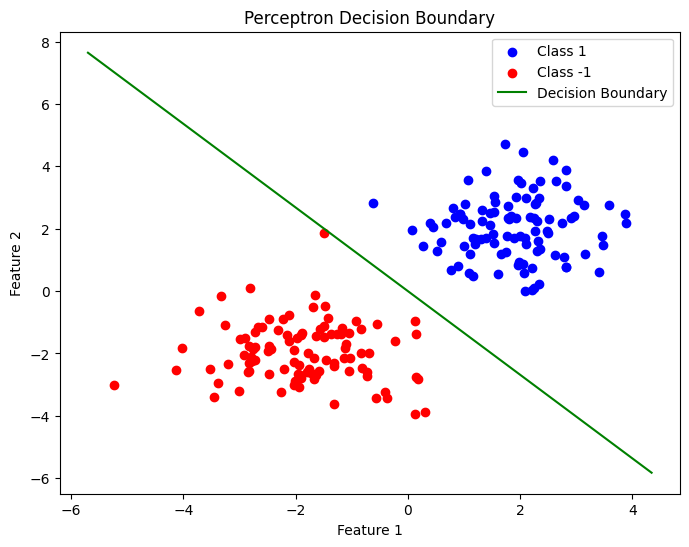

In [95]:
# Plot the decision boundary
plot_decision_boundary(X, y, weights)

## Q_2
Apply Perpectron Learning Algorithm on the  dataset 1 to classify it into two parts. 
If dataset it not linearly seaparble you can stop after 100 iterations. 
Also mentioned the total  correctly classify data points.

In [96]:
# Imports
import pandas as pd

In [102]:
# Load Dataset
data = pd.read_csv("PLA.csv", header=None)

# Assign features (X) and labels (y)
X2 = data.iloc[:, :-1].values  # All columns except the last one
y2 = data.iloc[:, -1].values   # The last column

# Convert labels from {0, 1} to {-1, 1}
y2 = np.where(y2 == 0, -1, 1)

print("Dataset loaded successfully.")
print(f"Features shape: {X2.shape}")
print(f"Labels shape: {y2.shape}")

Dataset loaded successfully.
Features shape: (40, 4)
Labels shape: (40,)


## Function to calculate number of Misclassification

In [98]:
# Fuction to calculate numbe of misclassifications
def misclassification(X, y, weights):
    misclassified = 0
    for i in range(len(y)):
        if y[i] * np.dot(X[i], weights) <= 0:
            misclassified += 1
    return misclassified

In [99]:
# Use the Perceptron Learning Algorithm to train the model

weights = PLA(X2, y2, 100)

print(f"Weights: {weights}")

Weights: [-2.2 -6.2  7.4  3.5]


In [100]:
# Calculate the number of misclassifications
misclassified = misclassification(X2, y2, weights)
print(f"Number of misclassifications: {misclassified}")

Number of misclassifications: 0


All pointes classified successfully. Dataset must be linearly separable

The data set has 4 features. Lets draw decision boundaries taking 2 featurs at a time

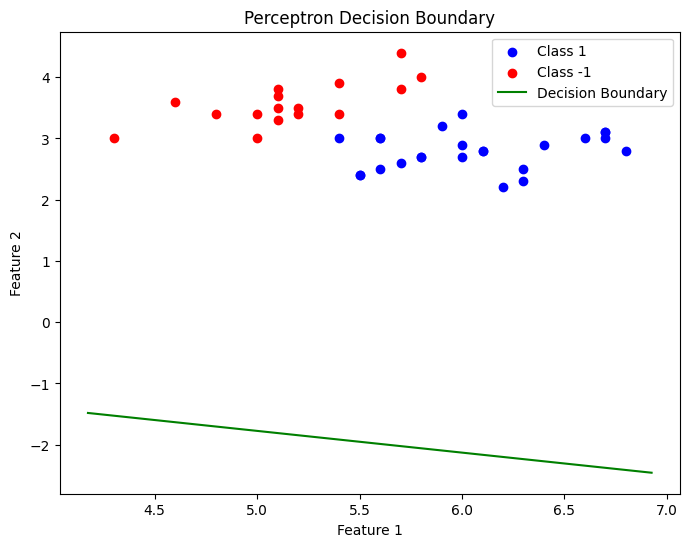

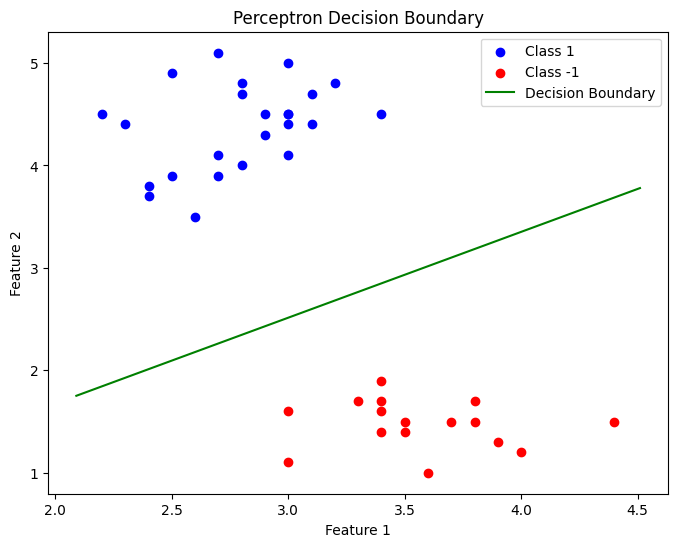

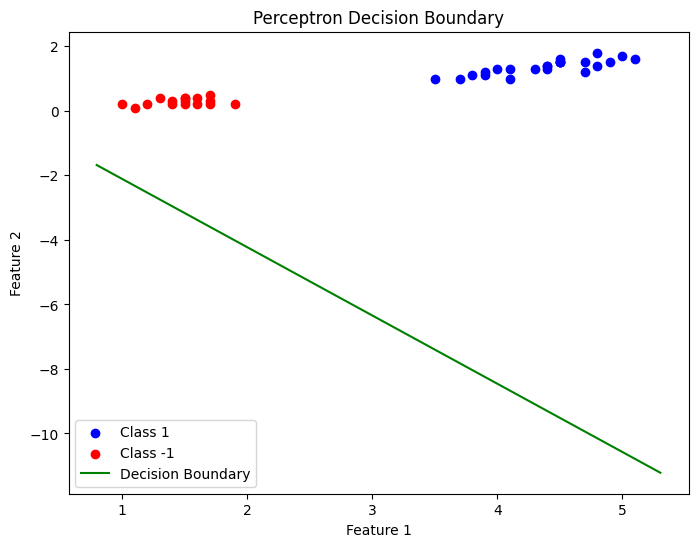

In [101]:
# Plotting decision boundaries taking 2 features at a time

# Feature 0 and 1
plot_decision_boundary(X2[:, :2], y2, weights[:2])

# Feature 1 and 2
plot_decision_boundary(X2[:, 1:3], y2, weights[1:3])

# Feature 2 and 3
plot_decision_boundary(X2[:, 2:], y2, weights[2:])